In [1]:
! pip install -qq seperability

In [2]:
import matplotlib.pyplot as plt
import torch
from seperability import Model

In [3]:
# Configure initial model and tests
model_size, token_limit  = "facebook/opt-125m", 1000
opt = Model( model_size, limit=token_limit )

- Loaded facebook/opt-125m
 - Registered 12 OPT Attention Layers


tensor([[    2,    20,  4758,   439,    62,     5, 16745,     4]],
       device='cuda:0')
['</s>', ' The', ' cat', ' went', ' up', ' the', ' stairs', '.']


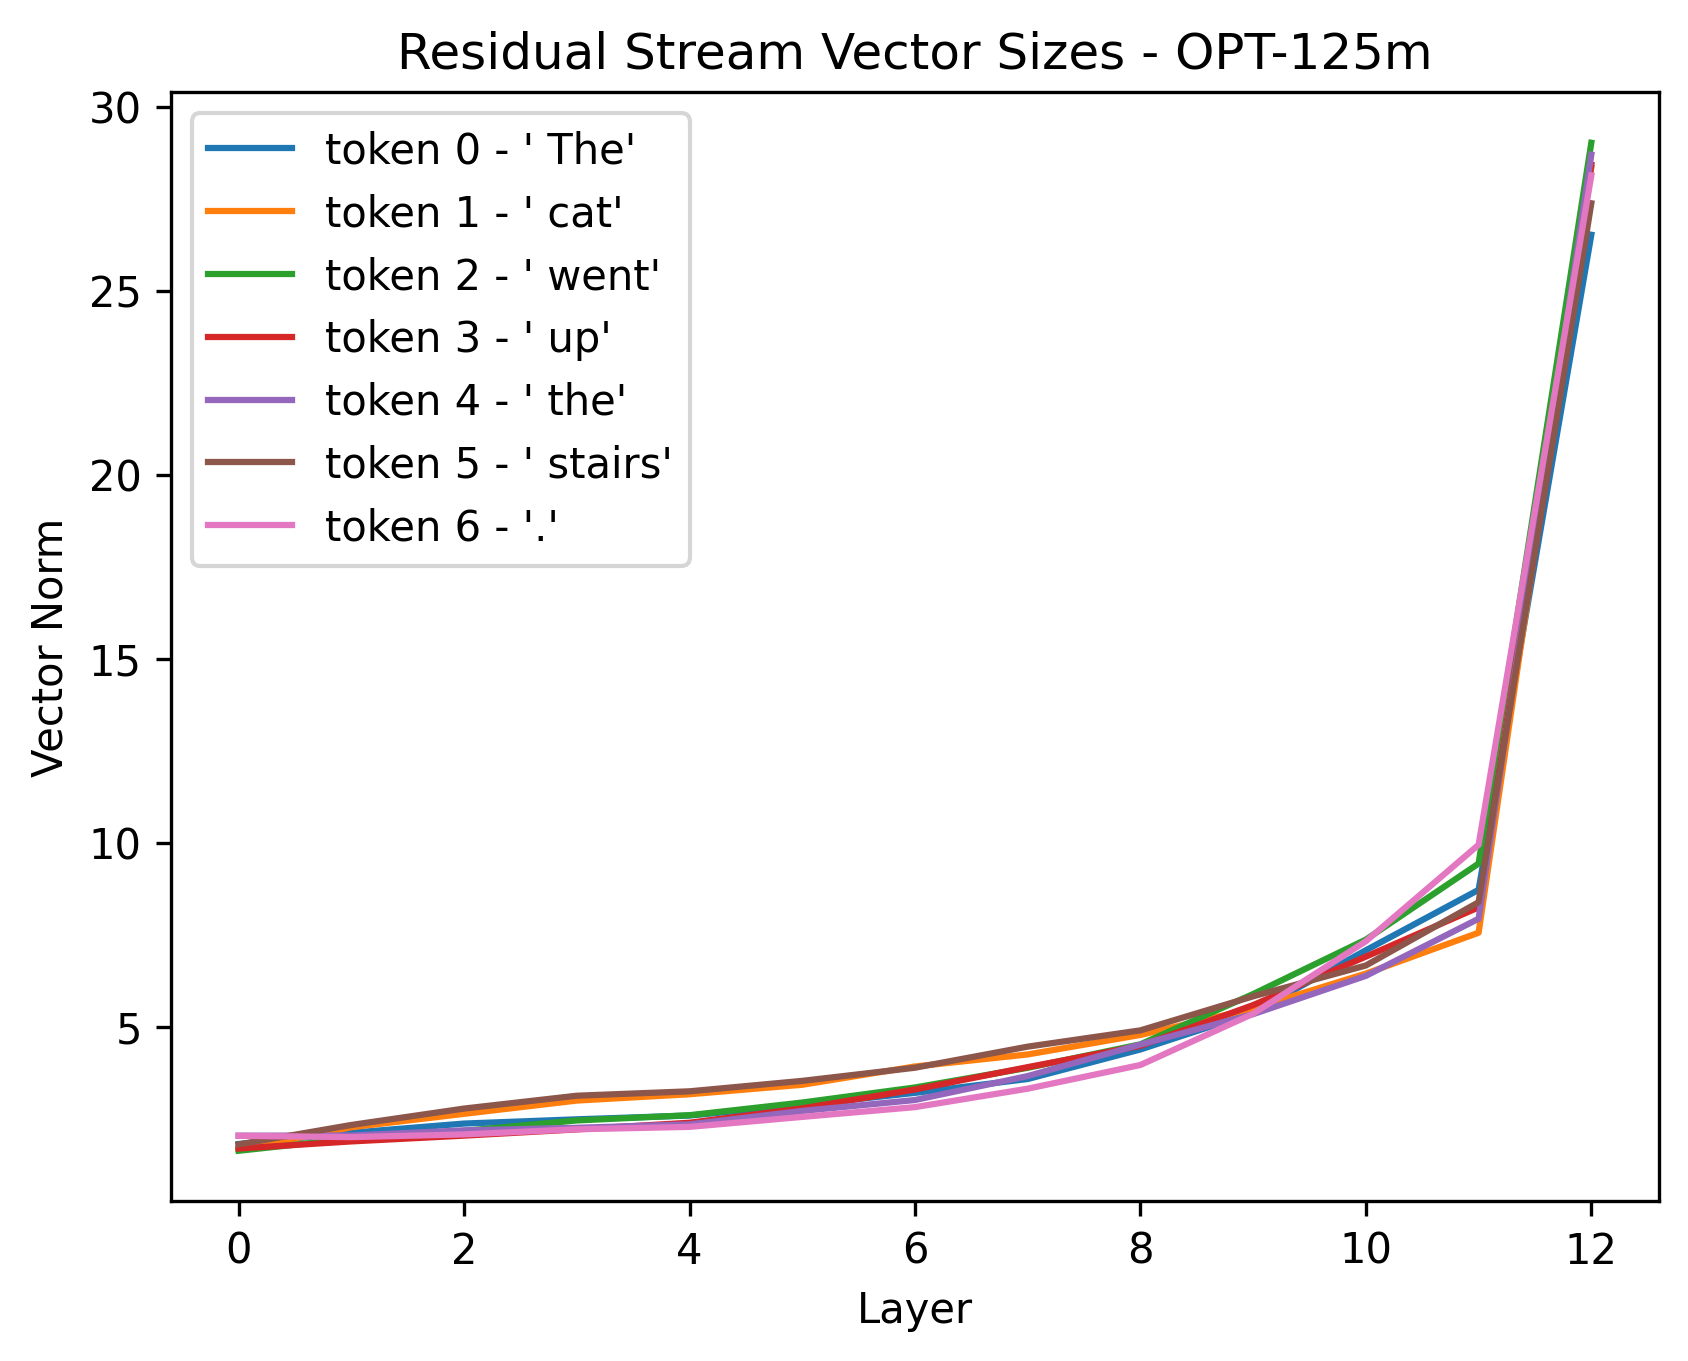

In [4]:
ids = opt.get_ids(" The cat went up the stairs.")
print(ids)
decoded_ids = [ opt.tokenizer.decode(_id) for _id in ids[0] ]
print(decoded_ids)

res = opt.get_residual_stream(input_ids=ids)
res_sizes = res.norm(dim=-1).T
for index, size in enumerate(res_sizes[1:]):
    # get only final outputs of decoder layers
    plt.plot(size[0::2].cpu(),
        label=f"token {index} - '{decoded_ids[index+1]}'"
    )
    
plt.title("Residual Stream Vector Sizes - OPT-125m")
plt.xlabel("Layer")
plt.ylabel("Vector Norm")
plt.legend()
plt.show()


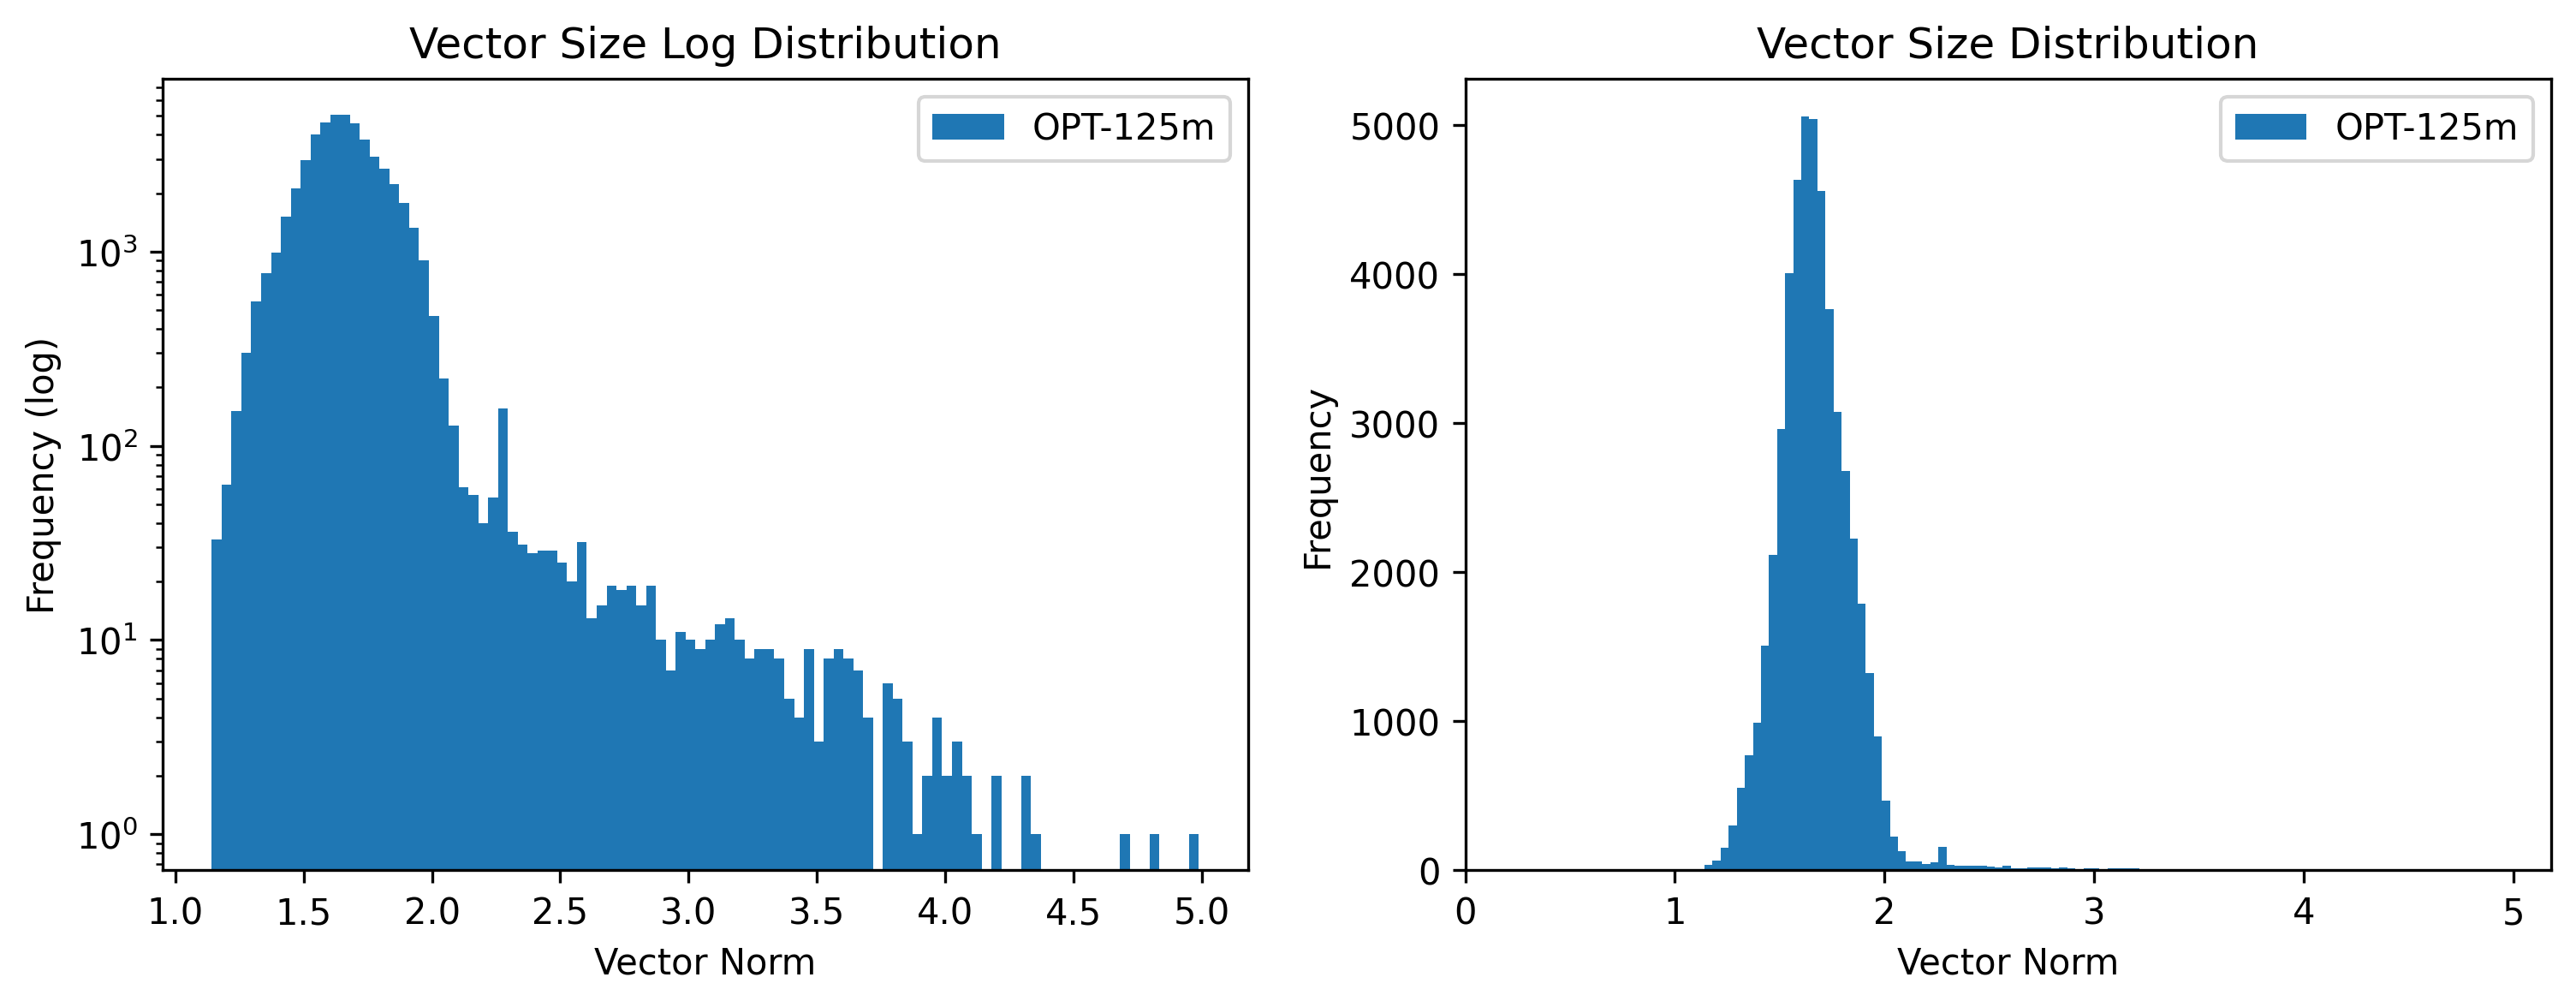

In [5]:
decoder = opt.model.decoder
W_E = decoder.embed_tokens.state_dict()["weight"]

norms = W_E.norm(dim=-1).cpu()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist( norms, bins=100, log=True, bottom=0, label="OPT-125m" )
ax1.set_xlabel("Vector Norm")
ax1.set_ylabel("Frequency (log)")
ax1.set_title("Vector Size Log Distribution")
ax1.legend()

ax2.hist( norms, bins=100, log=False, bottom=0, label="OPT-125m" )
ax2.set_title("Vector Size Distribution")
ax2.set_xlabel("Vector Norm")
ax2.set_ylabel("Frequency")

plt.xlim(0, None)
plt.legend()

plt.show()

tensor([2.2817, 2.2813, 1.4062,  ..., 2.2810, 2.2832, 2.2721], device='cuda:0')
 NEXT
torch.Size([50272]) torch.Size([50272, 768]) torch.Size([768, 50272])
torch.Size([768])
tensor(49973, device='cuda:0') dylib


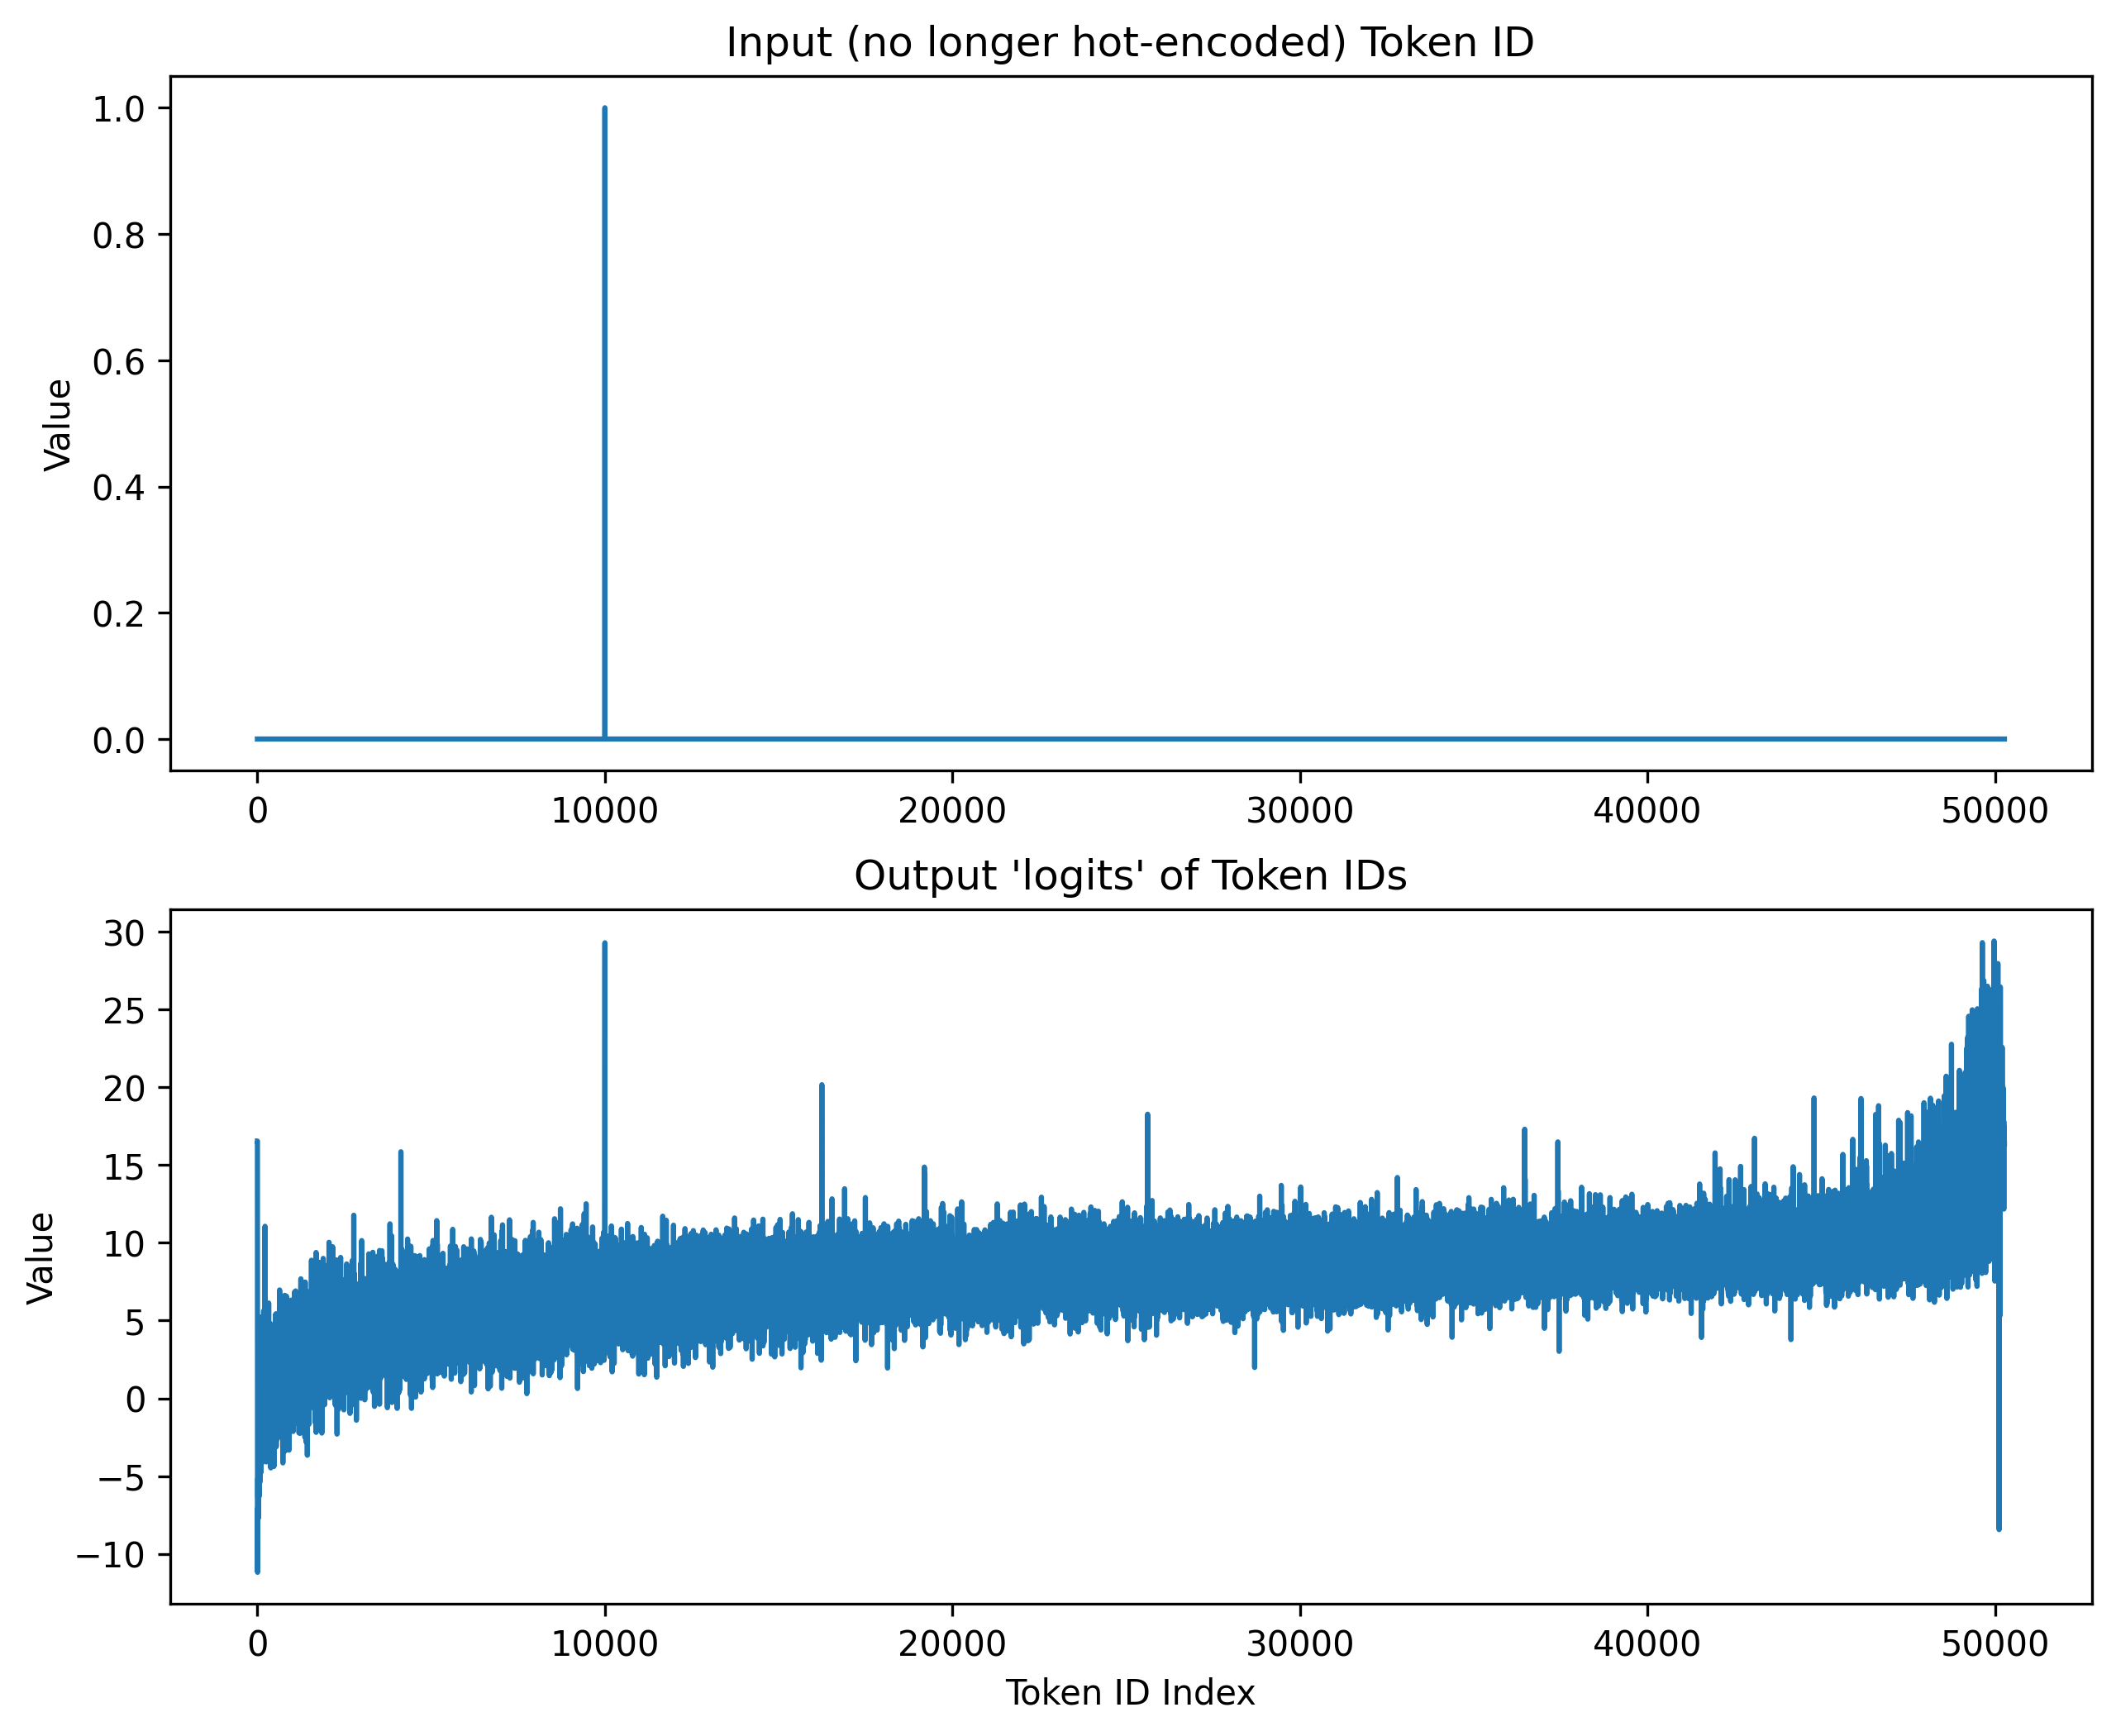

In [6]:
norms = W_E.norm(dim=-1)
# W_E_I = (W_E.T)*(1/(norms**2))
W_E_I = W_E.T
print(W_E_I.T.norm(dim=-1))

blank_vector = torch.zeros(len(W_E)).to(W_E.device)
v = blank_vector
v[10000] = 1
print(opt.tokenizer.decode(10000))
print(v.size(), W_E.size(), W_E_I.size())
encoded = torch.matmul( v, W_E )
print(encoded.size())
decoded = torch.matmul( encoded*10, W_E_I )

fix, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.plot(v.cpu())
ax1.set_title("Input (no longer hot-encoded) Token ID")
ax1.set_ylabel("Value")

ax2.plot(decoded.cpu())
ax2.set_title("Output 'logits' of Token IDs")
ax2.set_xlabel("Token ID Index")
ax2.set_ylabel("Value")

decoded_id = torch.argmax(decoded)
print(decoded_id, opt.tokenizer.decode(decoded_id))
#plt.plot(torch.softmax(decoded*14, dim=-1).cpu())

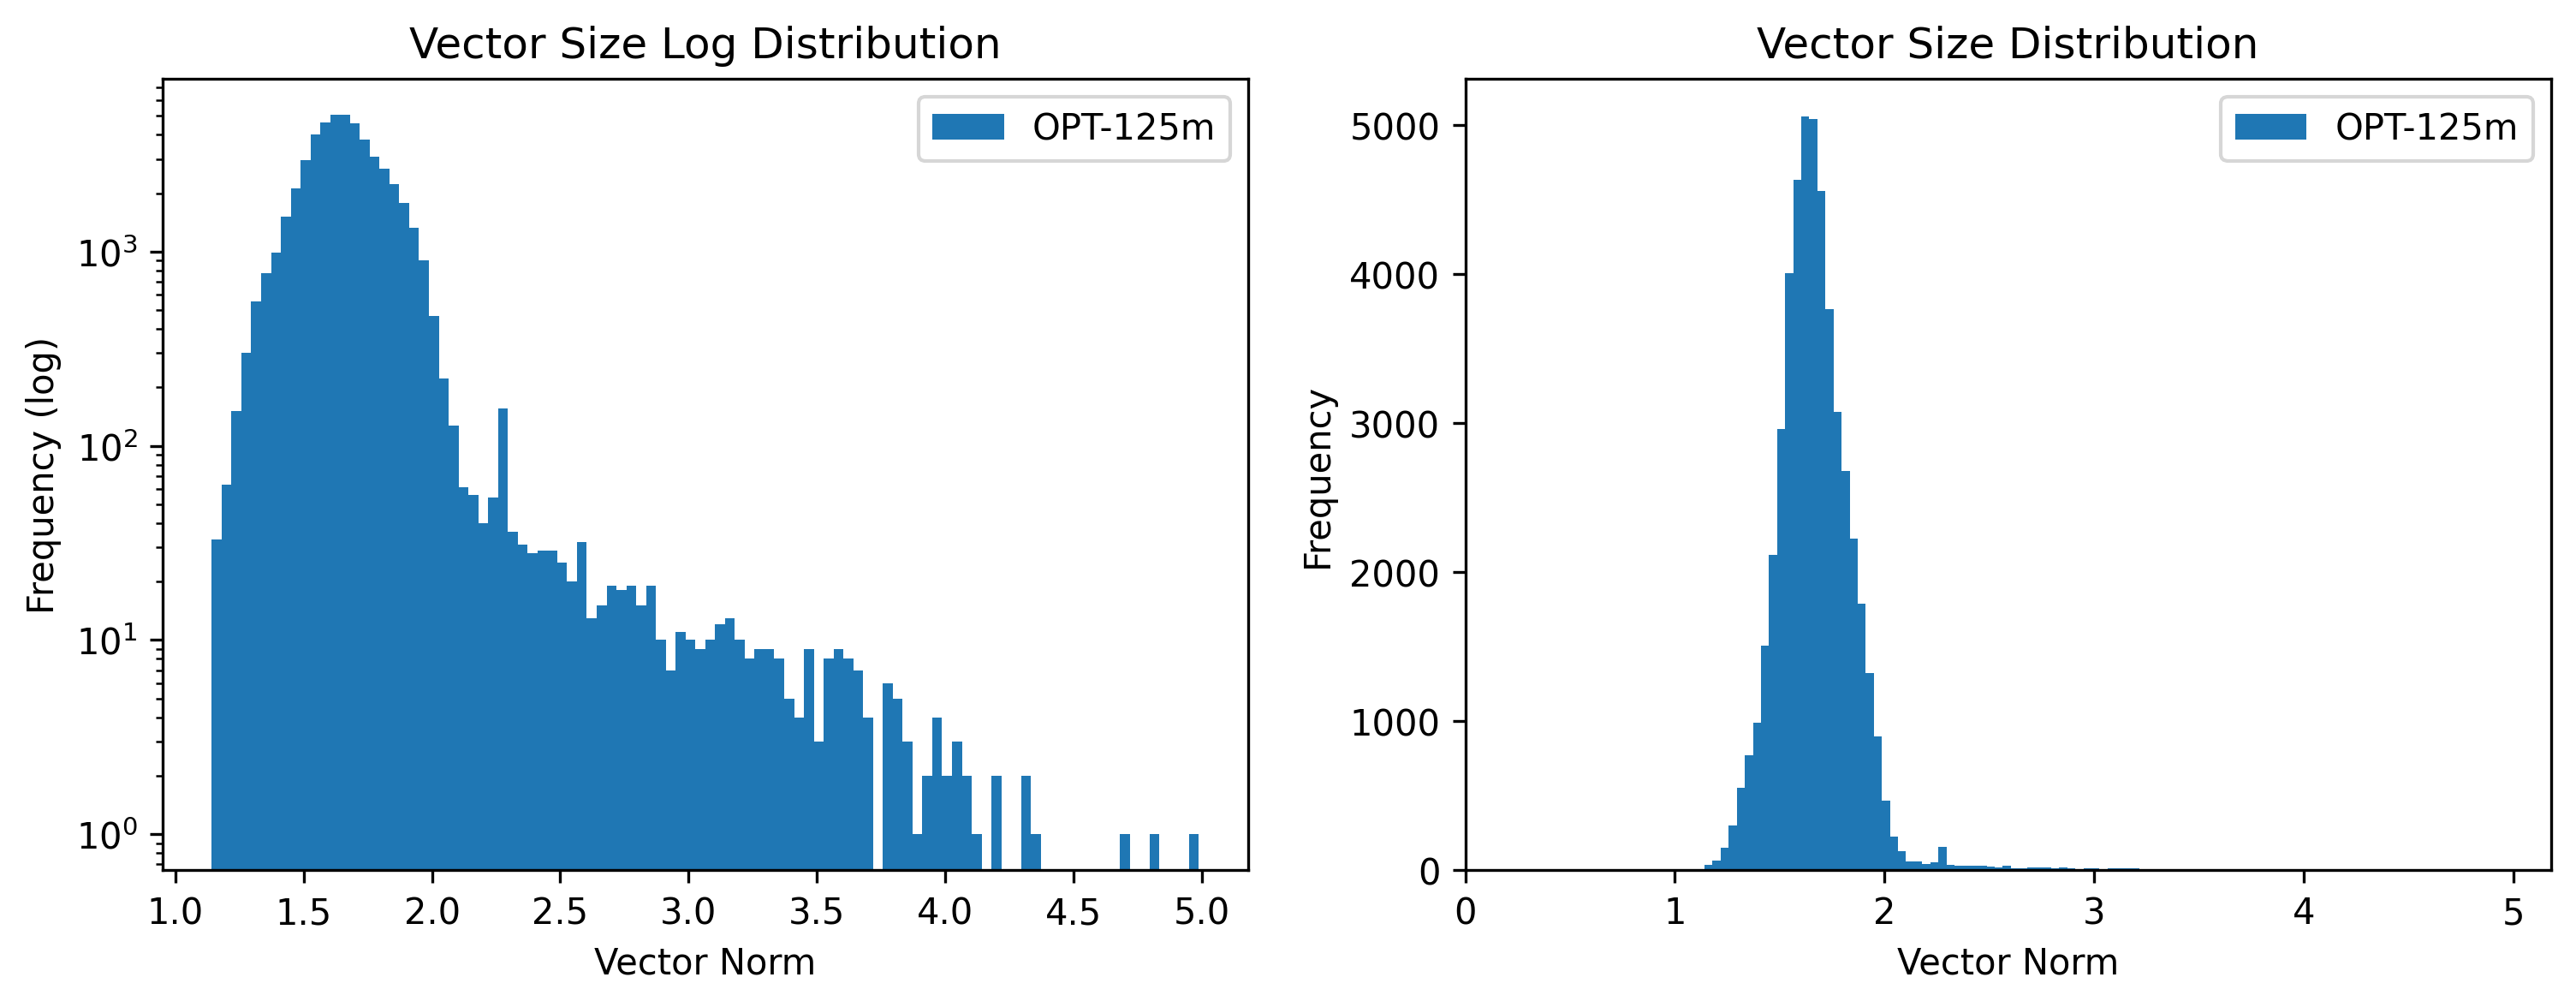

In [7]:
unembed = opt.predictor.get_output_embeddings().state_dict()["weight"]

norms = unembed.norm(dim=-1).cpu()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))        
 
ax1.hist( norms, bins=100, log=True, bottom=0, label="OPT-125m" )
ax1.set_xlabel("Vector Norm")
ax1.set_ylabel("Frequency (log)")
ax1.set_title("Vector Size Log Distribution")
ax1.legend()

ax2.hist( norms, bins=100, log=False, bottom=0, label="OPT-125m" )
ax2.set_title("Vector Size Distribution")
ax2.set_xlabel("Vector Norm")
ax2.set_ylabel("Frequency")

plt.xlim(0, None)
plt.legend()

plt.show()